# Predict survival on the Titanic using Excel, Python, R & Random Forests

## Competition Site

Description, Evaluation, and Data Set taken from the [competition site](https://www.kaggle.com/c/titanic).

## Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Evaluation

The historical data has been split into two groups, a 'training set' and a 'test set'.  For the training set, we provide the outcome ( 'ground truth' ) for each passenger.  You will use this set to build your model to generate predictions for the test set.

For each passenger in the test set, you must predict whether or not they survived the sinking ( 0 for deceased, 1 for survived ).  Your score is the percentage of passengers you correctly predict.

 The Kaggle leaderboard has a public and private component.  50% of your predictions for the test set have been randomly assigned to the public leaderboard ( the same 50% for all users ).  Your score on this public portion is what will appear on the leaderboard.  At the end of the contest, we will reveal your score on the private 50% of the data, which will determine the final winner.  This method prevents users from 'overfitting' to the leaderboard.
 
 ## Data Files

| File Name | Available Formats |
|: --------- |:-----------------|
|  train	|  .csv (59.76 kb)  |
|gendermodel|  .csv (3.18 kb)  |
|genderclassmodel|	.csv (3.18 kb)|
|test     |	 .csv (27.96 kb)  |
|gendermodel|   .py (3.58 kb)|
|genderclassmodel|	.py (5.63 kb)|
|myfirstforest	|.py (3.99 kb)|


<pre>
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
</pre>

In [1]:
%matplotlib inline 
%run ./env.py

In [2]:
! cat env.py

# !/usr/bin/env python

import pandas as pd
from pandas import DataFrame
import numpy as np
import pylab as plt
import seaborn as sns


# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))   # (weight, high)


In [3]:
def parse_csv(name):
    df = DataFrame(pd.read_csv('Data/{}.csv'.format(name), header=0))
    return df

df_train = parse_csv('train')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


In [6]:
df_train.dtypes  # data types only

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df_train.info()  # check to see the missing values and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [8]:
df_train.describe()
# count == number of rows

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature: Passenger Classes

In [9]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

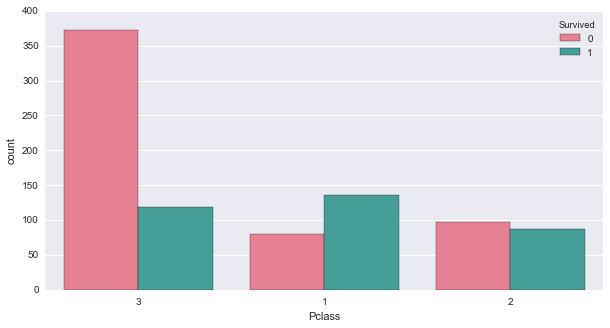

In [33]:
sns.countplot(x='Pclass', data=df_train, hue='Survived', palette="husl")

In [22]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt.sum(1).astype(float)

Pclass
1    216
2    184
3    491
dtype: float64

In [21]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


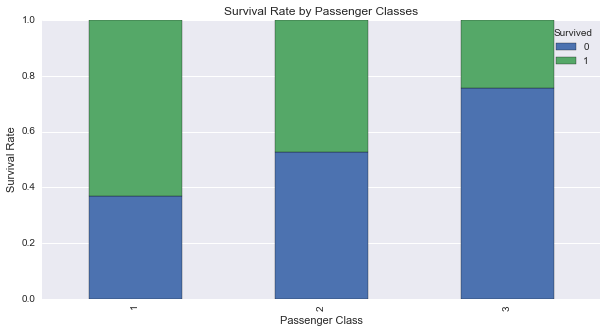

In [36]:
pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

## Feature: Sex

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [38]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

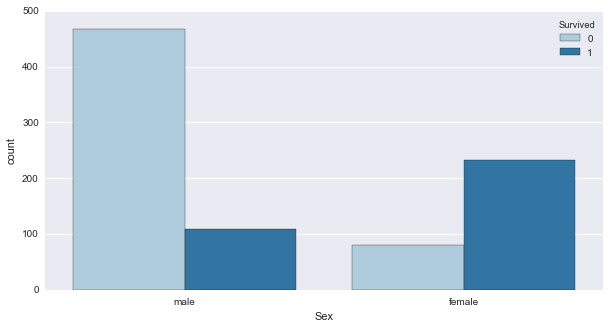

In [46]:
sns.countplot(x="Sex", hue="Survived", data=df_train, palette="Paired")

In [49]:
df_cross = pd.crosstab(df_train.Sex, df_train.Survived)
df_cross

Survived,0,1
Sex,,
female,81,233
male,468,109


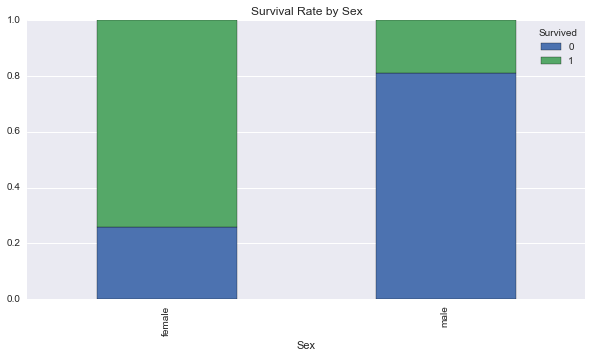

In [54]:
df_percent = df_cross.div(df_cross.sum(axis=1).astype(float), axis=0)
df_percent.plot(kind='bar',
                stacked=True,
                title='Survival Rate by Sex')

In [14]:
df_train = df_train[df_train.Sex =='male']
df_train.Pclass.value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

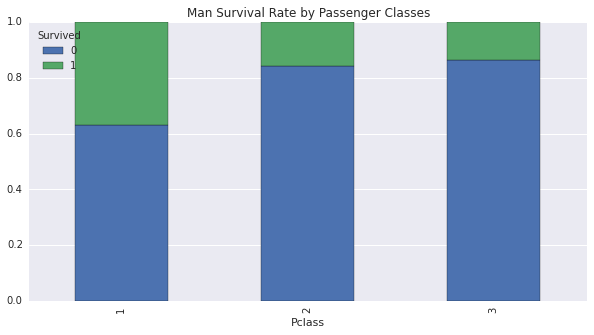

In [33]:
# sns.countplot(x='Pclass', hue='Survived', data=df_train, palette="Paired")
df_man = pd.crosstab(df_train.Pclass, df_train.Survived)  # (index, column)
df_man_percent = df_man.div(df_man.sum(axis=1).astype(float), axis=0)  # 行对行除
df_man_percent.plot(kind='Bar',
                    stacked=True,
                    title="Man Survival Rate by Passenger Classes")
plt.xlabel = "Passenger Classes"
plt.ylabel = "Survival Rate"